# Practical works 9 & 10: Face recognition by Eigenfaces method


**The objective of this practical work is to study the properties of the Eigenfaces face recognition method.**

We propose to develop a system capable of:
- identify a face from a database of faces 
- determine whether an image contains a face present in the database
- to decide whether an image represents a face or not

Tools developed in this practical work will be applied to the Yale Faces Database.

## General principle

The problem of face recognition is defined as follows: given a face image, one wishes to determine the identity of the corresponding person.
To this end, it is necessary to have reference images, in the form of a database of faces of all persons known by the system. 
Each face is associated with a vector of characteristics. 
These characteristics are supposed to be invariant for the same person, and different from one person to another one. 
Face recognition then consists of comparing the vector of characteristics of the face to be recognized with those of each of the faces of the database. 
This makes it possible to find the person in the database having the most similar face.

There are several types of methods, distinguished by the type of characteristics used, see _S.A. Sirohey, C.L. Wilson, and R. Chellappa. Human and machine recognition of faces: A survey. Proceedings of the IEEE, 83(5), 1995_ for a state of the art:

- The approaches by face models proceed to a biometric analysis of faces. Pertinent biometrics are the distance between the eyes, length of the nose, and shape of the chin...
- Image-based approaches, by contrast, directly compare faces, considering them as images, for which measures of pre-attentive similarities (without a priori model) are defined.
- Hybrid approaches use the notions of similarity between images, but add a priori knowledge about the structure of a face.

![principe.png](./figs/Figure_1.png)
<center>Figure 1: General Principle of a Face Recognition System</center>

## Analysis by Eigenfaces

Face recognition by Eigenfaces is an image-based approach. 
Each face image is considered as a vector in a space having as many dimensions as the number of pixels in the image. 
The image characteristics are extracted by a method of dimensionality reduction based on principal component analysis (PCA). 
This approach was originally proposed in 1991, see Mr. Turk and A. Pentland. Eigenfaces for recognition. J. Cognitive Neuroscience, 3(1) :71-86, 1991_.

In the following, we will use the italic notation to designate scalars ($m, K,\dots$) and vectors ($x, u$), and boldface  for the matrices ($\mathbf X, \mathbf X_c, \mathbf W, \dots$).

A face image is noted $x$ and represented as a vector of $d$ components. $x[i] (i=0,\cdots,d-1)$ is the pixel number $i$ of this image. A set of faces form a cloud of points in the space $\mathbb{R}^d$. 
The database is divided into two sets: the *training* or *reference* set, used to learn the faces, and the *test* set, used to test the method. 
Faces of the training set are denoted by $x_k^{train}$ $(k=0,\cdots,N_{train}-1)$ and faces of the test set are denoted by $x_k^{test}$ $(k=0,\cdots,N_{test}-1) (k=0,\cdots,N_{test}-1)$.

We note $x_{average}$ the average of the reference faces, or average face. 
The principle of the Eigenfaces method is to model the difference of any face in relation to this average face by a linear combination of a limited number of images $u_h$, called Eigenfaces. 
One image of face $x \in \mathbb{R}^d$ is thus expressed as the average face to which is added a linear combination of eigenfaces:

$$x = x_{average} + \sum_h a_h u_h + \varepsilon$$

where $a_h$ represents the weight of *the eigenface* of index $h$ in the face $x$, and $\varepsilon$ represents the error between $x$ and its approximation by eigenfaces (the error is due to the truncation of the basis of eigenvectors). 
Coefficients $a_h$ play a very important role for face recognition, because they correspond to the face coordinates $x$ in the face subspace.

The Eigenfaces method is based on the fact that the number of eigenfaces is much smaller than the total size of the space, which is called dimensionality reduction. In other words, the basis of eigenfaces is truncated, keeping only the vectors coding for the most significant information.
The images are therefore analyzed in a sub-space of reduced dimensions, which represents more specifically faces, among all possible types of images.

The average face is always the same for a fixed reference database, each face is examined after subtraction of the average face.

## Face database

We use the Yale Faces image database, http://cvc.cs.yale.edu/cvc/projects/yalefaces/yalefaces.html.
In this database, all the faces have been preprocessed, in order to resize and crop them to the size $64\times64$ pixels, so the images can be compared pixel per pixel.


This database contains 120 greyscale images, representing the faces of 15 people. There are 8 images per person, each corresponding to a category of images varying according to the following criteria (see Figure 2):
- variation of facial expression: normal, sad, sleepy, surprised,
    wink, happy
- variation of accessories: glasses, noglasses,

![database.png](./figs/Figure_2.png)
<center>Figure 2: Illustration of the shooting categories</center>

The database is divided into two groups: the reference group will be used as a training set, and the other group as a test set: 
- the reference base contains $n$ images, each with a number of pixels $d=n_l\times n_c$. There are $6$ images per person in the training database, so $n=6\times15=90$. Each image is $64\times64$, hence $d=4096$, 
- the test base contains $2$ images per person so a total of 30 images. Each image is again $64\times64$.

In the following, we always manipulate face images in the form of vectors, and a set of faces in the form of a matrix where each column is a face. 
As we use Numpy, the images are stored in a multi-dimensional array of reals (double). 
This array is viewed as a matrix $\mathbf X$ of size $d\times n$: $$\mathbf X= \left[ x_0, ..., x_{n-1}\right]$$.

The matrix $\mathbf X$ is split into $\mathbf X^{train}$ and $\mathbf X^{test}$ of size $d\times N_{train}$ and $d\times N_{test}$, respectively.

# Exercise 1: loading the database, display, and centering of faces

Vectors $id$ and $cat$ give information about the images: $id[k]$ and $cat[k]$ are respectively the identification (an index) and the category of face $k$. These vectors are available for the reference and the test bases and will be useful in the following.

To load the database, we simply have to read the Matlab file `YaleFaces.mat` provided with this notebook: it provides the matrices and vectors $\mathbf X^{train}, \mathbf X^{test}, id^{train}, id^{test}, cat^{train}, cat^{test}$.

The following code loads the database and creates the various matrices and vectors: 

In [2]:
##### Useful libraries
import numpy.linalg
import numpy as np
import matplotlib.pyplot as plt

## Loading YaleFaces database
import scipy.io

yaleFaces = scipy.io.loadmat('./YaleFaces.mat')

# The training set (90 faces)
X_train = yaleFaces['X_train']
cat_train = yaleFaces['cat_train'][0]
id_train = yaleFaces['id_train'][0]-1

# The test set (30 faces)
X_test = yaleFaces['X_test']
cat_test = yaleFaces['cat_test'][0]
id_test = yaleFaces['id_test'][0]-1

# Additional images that don't contain faces 
X_noface = yaleFaces['X_noface']

# imShow function to be used later
def imshow(I, title=None, size=300, axis=False):
    """ display an image, with title, size, and axis """
    plt.figure(figsize=(size//80, size//80))
    plt.gray()
    plt.imshow(I)
    if not axis: plt.axis('off')
    if title: plt.title(title)
    plt.show()

1.  Write a function that computes the average face $x_{moy}$. \
    Tip: use `mean` function from Numpy.

In [3]:
def meanFaces(X):
    """ Array[d,n] -> Vector[d] """
    return np.mean(X, axis = 1)

2.  Write a function that centers the faces. \
    Recall: center means subtract the average face.

In [4]:
def centeredFaces(X):
    """ Array[d,n]*Vector[d] -> Array[d,n] """
    meanfaces = meanFaces(X)
    return (X.T - meanfaces).T

3. Write a function `deflat()` that takes as argument a face, represented as a vector of 4096 elements, and returns an image of size $64\times64$. \
   Important: the Yale Faces database has been created in Matlab, for which the matrices are organized column by column. It may be useful to transpose the matrix.


In [5]:
def deflat(V):
    """" Vector[4096] -> Array[64,64] """
    return V.reshape((64,64)).T

4. Display the average face, as well as a few faces with the associated centered faces. Here is an example of the expected result:
![Figure_3.png](./figs/Figure_3.png)
<center>Figure 3: average face and centering of the database</center>

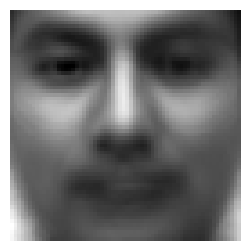

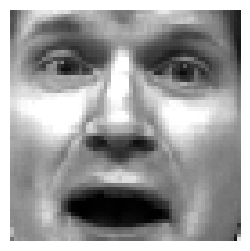

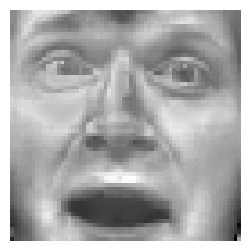

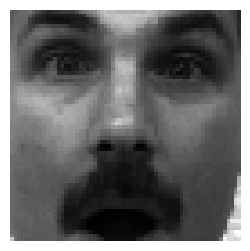

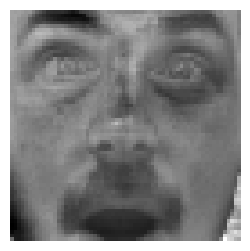

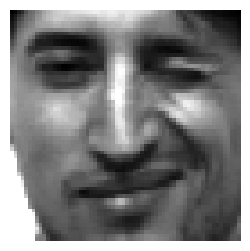

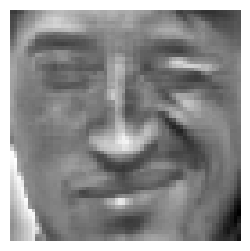

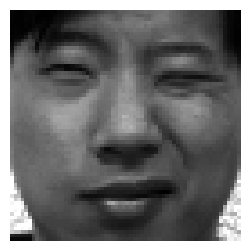

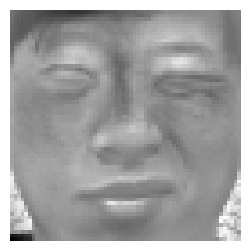

In [6]:
X_train_centered = centeredFaces(X_train)

imshow(deflat(meanFaces(X_train)))
imshow(deflat(X_train.T[5]))
imshow(deflat(X_train_centered.T[5]))
imshow(deflat(X_train.T[11]))
imshow(deflat(X_train_centered.T[11]))
imshow(deflat(X_train.T[17]))
imshow(deflat(X_train_centered.T[17]))
imshow(deflat(X_train.T[23]))
imshow(deflat(X_train_centered.T[23]))

# Exercise 2: Computation of Eigenfaces (PCA)


The method developed by Turk and Pentland defines the eigenfaces as the main axes obtained by carrying out a principal component analysis (PCA) of the vectors associated with the reference faces. 
**The eigenfaces are thus the eigenvectors of the covariance matrix $\mathbf X_c\mathbf X_c^\top$**, of size $d\times d$ , where the matrix $\mathbf X_c$ of the same size as $\mathbf X$ represents all the centered faces:
$$\mathbf X_c= \left[ x_0-x_{moy}, \cdots x_{n-1}-x_{moy}\right]$$
Each line of $\mathbf X_c$ corresponds to a pixel $p$, each column of $\mathbf X_c$ corresponds to a reference face of index $k$.

Rather than using eigenvalue decomposition, we will use singular value decomposition (SVD). 
The SVD decomposes the matrix $\mathbf X_c$ of size $d\times n$ into 3 matrices $\mathbf U$, $\mathbf S$, $\mathbf V$ such as :

$$\mathbf X_c=\mathbf U \mathbf S\mathbf V^\top$$

where $\mathbf U$ and $\mathbf V$ are orthogonal matrices ($\mathbf U \mathbf U^\top=\mathbf U^\top \mathbf U=\mathbf I_d^d$ and $\mathbf V \mathbf V^\top=\mathbf V^\top \mathbf V=\mathbf I_d^n$) of respective sizes $d\times d$ and $n\times n$, and $\mathbf S$ is a matrix of size $d\times n$ with null elements everywhere except on the main diagonal.

This decomposition has the following properties:
- the columns of $\mathbf V$ are the eigenvectors of $\mathbf X_c^\top\mathbf X_c$, 
- the columns of $\mathbf U$ are the eigenvectors of $\mathbf X_c\mathbf X_c^\top$,
- the matrix $\mathbf S$ is diagonal. The diagonal represents the singular values of $\mathbf X_c$, equal to the square roots of the eigenvalues $\lambda_k$ of $\mathbf X_c^\top\mathbf X_c$ and
    $\mathbf X_c\mathbf X_c^\top$. 

With Numpy, the SVD can be calculated by this way:

`U, S, V = numpy.linalg.svd(Xc)`

In our case, $n<d$, and the eigenvalues $\lambda_k$ of $\mathbf X_c\mathbf X_c^\top$ are therefore all null for $k>n$.
We will not need the associated eigenvectors $k>n$. 
The `svd` function has a fast mode, which calculates only the eigenvectors corresponding to the columns of the matrix passed as argument:

`U, S, V = svd(Xc, full_matrices=False)`


This command returns the matrices $\mathbf U$ and $\mathbf V$, of size $d\times n$ and $n\times n$, and the matrix $\mathbf U$ matrix has been truncated, only the first $n$ columns are retained:
$$\mathbf U= \left[ u_1, \cdots, u_n\right]$$
Finally `S` is a vector of size $n$ and represents the diagonal matrix $\mathbf S$.

1. Write a function `eigenfaces(Xc)` which returns a t-uple consisting of the $\mathbf U$ matrix of eigenfaces, computed from a centered database $\mathbf X_c$, and the table of associated eigenvalues.
        

In [7]:
def eigenfaces(Xc):
    """ Array[d,n] -> Array[d,n]*Vector[n] """
    U, S, V = np.linalg.svd(Xc, full_matrices=True)
    S = S**2
    return (U.T, S/np.sum(S))

2. Use this function to calculate $\mathbf U$ and $\mathbf S$. Normalize then the eigenvalues so that their sum is equal to 1.


In [8]:
U, eigenvalues = eigenfaces(X_train_centered)

normalized_eigenvalues = eigenvalues / np.sum(eigenvalues)

3. Display the average face and the first 15 eigenfaces (see figure 4, use the `plt.subplot()` function).
   and their associated own values. Give your interpretation of the eigenfaces images?

![Figure_4.png](./figs/Figure_4.png)
<center>Figure 4: the 15 first eigenfaces</center>

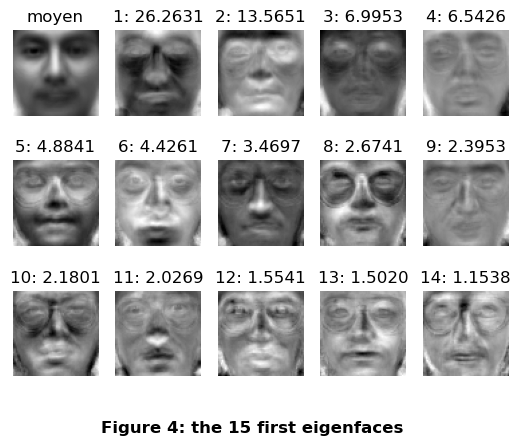

In [9]:
plt.show()
plt.figure(351)
plt.subplot(3,5,1)
plt.imshow(deflat(meanFaces(X_train)))
plt.axis('off')
plt.title('moyen')
plt.figtext(0.5, 0.01, 'Figure 4: the 15 first eigenfaces', ha='center', va='bottom', fontsize=12, fontweight='bold')

for i in range(2,16):
    plt.subplot(3,5,i)
    plt.imshow(deflat(U[i-2]))
    plt.axis('off')
    plt.title(f'{i-1}: {eigenvalues[i-2]*100:.4f}')

plt.show()

4. Plot the curve of the cumulative sum of the normalized eigenvalues (see Figure 5 for the expected result), to see how much variation is captured by the first $K$ eigenfaces. How many eigenfaces are needed to obtain a good reconstruction?    
    
![Figure_5.png](./figs/Figure_5.png)
<center>Figure 5: cumulative sum of eigenvalues</center>

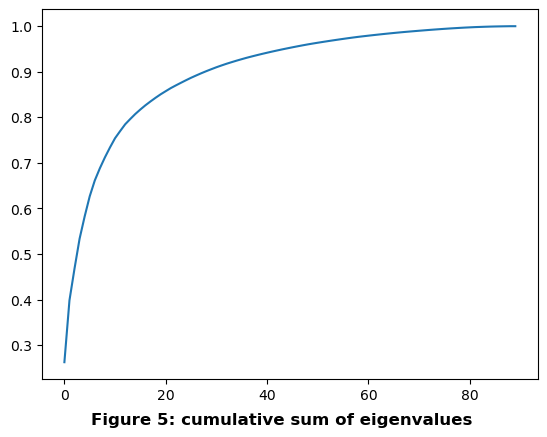

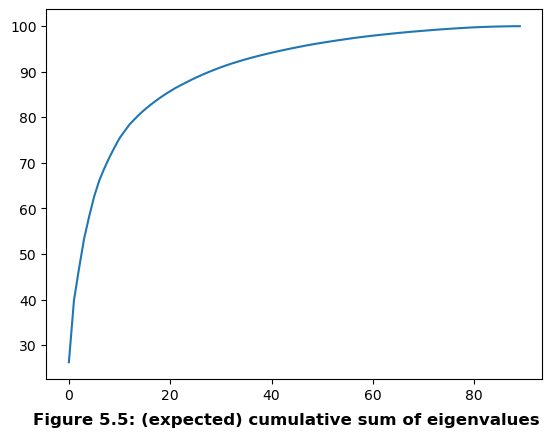

In [10]:
# You ask for the normalized eigenvalues. Shouldn't the graph be the following?
plt.plot(np.cumsum(normalized_eigenvalues))
plt.figtext(0.5, 0.01, 'Figure 5: cumulative sum of eigenvalues', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()

# Either way, the expected one is this:
plt.plot(np.cumsum(normalized_eigenvalues*100))
plt.figtext(0.5, 0.01, 'Figure 5.5: (expected) cumulative sum of eigenvalues', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()

# Exercise 3: projection in the subspace of faces


In the following, we use a reduced number of eigenfaces/eigenvectors. The vectorial space of faces, $\mathbf W_K$, is spanned by the basis formed with the $K$ first eigenvectors:

$$\mathbf W_K = \left[ u_1, ..., u_K\right]$$

Note that the set of columns of $W_K$ is an orthonormal basis, so $\mathbf W^\top_K\times \mathbf W_K=\mathbf I_d^K$.

The **projection of a face image $x$ in the face subspace** is simply done by subtracting from $x$ the average face and applying the scalar product with each eigenvector. 
This gives the coordinates of the image $x$ in the subspace of faces, which is of dimension $K$.

Each face therefore has several representations:
-   the original image, a vector $x \in \mathbb{R}^n$
-   the coordinates of the projected image $z$ in the basis of eigenfaces,
    $\left\lbrace a_h\right\rbrace$,
    $h \in\left\lbrace 1;K\right\rbrace$ (subspace of faces):
    $$z = \mathbf W_K^\top (x-x_{average})$$
-   its reconstruction in the original space $\mathbb{R}^n$,
    $\tilde{x}$:
    $$\tilde{x} = x_{average} + \sum_h a_h u_h = x_{moy} + \mathbf W_K  z$$

**The reconstruction error is defined** as the distance between a face $x$ and the associated reconstruction $\tilde x$:
$$E^{recons}(x) =\|x-\tilde{x}\|_2  = \sqrt{\sum_{p=1}^n \left( x(p) - \tilde{x}(p)\right) ^2}$$

1. Write a function `projEigenfaces()` which takes as arguments a face, $x$, the average face, $x_{average}$, the subspace of faces $\mathbf W$, the number of eigenfaces $K$, and  computes the coordinates of projected face $z$ in the subspace $\mathbf W_K$ of faces.    

In [11]:
def projEigenface(x, x_mean, W, K):
    """ Vector[d]*Vector[d]*Array[d,n]*int -> Vector[K] """
    # Subtract the average face from the input face
    x_diff = x - x_mean
    
    # Take the dot product with the first K eigenvectors of the subspace W
    z = np.dot(x_diff, W[0:K].T)
    
    return z

2.  Write a function `reconstruct()` which takes as arguments a projected face, $z$, the average face, $x_{average}$, and the truncated subspace of face, $W$ and $K$, and computes the coordinate of $x$ in the original space ($\mathbb{R}^n$).    

In [12]:
def reconstruct(z, x_mean, W, K):
    """Vector[K]*Vector[d]*Array[d,n]*int -> Vector[d] """
    # Reconstruct the face using the first K eigenvectors and the projected coordinates
    x_reconstructed = x_mean + np.dot(z, W[0:K])
    
    return x_reconstructed

3.  Write a function  `errorReconstruct()` which computes the recontruction error between $\tilde{x}$ and $x$.

In [13]:
def errorReconstruct(x_r, x):
    """Vector[d]*Vector[d] -> double """
    # Compute the reconstruction error as the L2 norm between x_r and x
    reconstruction_error = np.linalg.norm(x_r - x)

    return reconstruction_error

4.  Write a function `affiche_Reconstruction()` which displays:
    - the original face $x$,
    - the reconstructed faces $x_r$ for various values of $K$ (for instance, $K =$ 5, 10, 25, 50, 90).

In [14]:
def affiche_reconstruction(x, x_moy, W, listK):
    """ Vector[d]*Vector[d]*Array[d,n]*list[int] -> NoneType """
    # Display the original face
    plt.subplot(1, 2, 1)
    plt.imshow(deflat(x))
    plt.axis('off')
    plt.title('Original Face')
    plt.show()

    # Display the reconstructed faces for various values of K
    for i, K in enumerate(listK):
        # Project and reconstruct the face using K eigenfaces
        z = projEigenface(x, x_moy, W, K)
        x_reconstructed = reconstruct(z, x_moy, W, K)

        # Display the reconstructed face
        plt.subplot(2, 3, i + 1)
        plt.imshow(x_reconstructed.reshape((64, 64)), cmap='gray')
        plt.axis('off')
        plt.title(f'K={K}: {errorReconstruct(x_reconstructed, x):.2f}')

    plt.tight_layout()
    plt.show()

5.  Test the previous functions by displaying the projection/reconstruction result for several images (from the training and test bases). Figure 6 shows the result of the reconstruction for image 50 of the training base. For image 55 of the training base, what is the reconstruction error for $K=n=90$? Is the image identical to its reconstruction? Same question for image 17 of the test base.

![Figure_6.png](./figs/Figure_6.png)
<center>Figure 6: Example of reconstruction for image number 50</center>

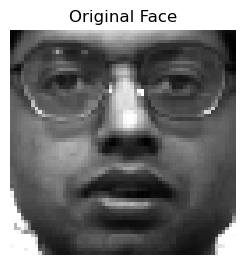

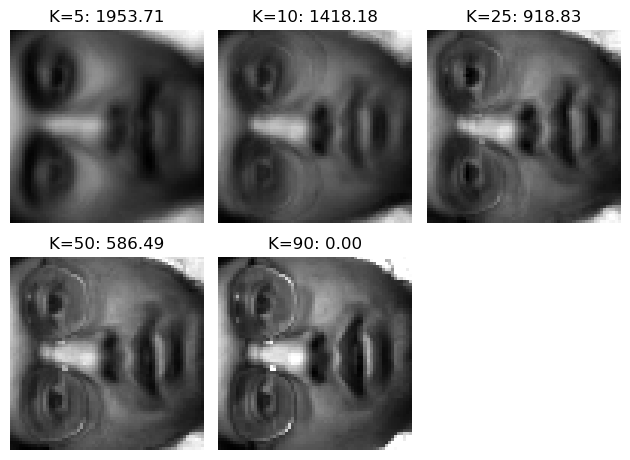

In [15]:
affiche_reconstruction(X_train.T[54], meanFaces(X_train), U, [5, 10, 25, 50, 90])

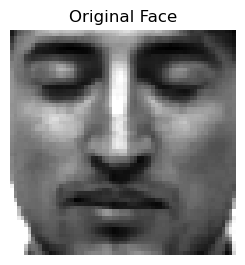

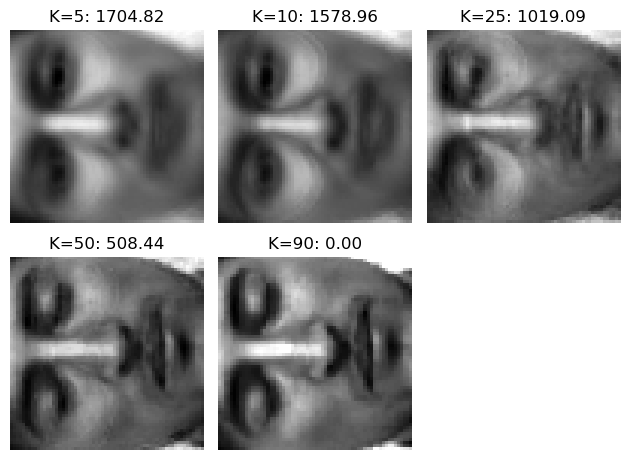

In [16]:
affiche_reconstruction(X_train.T[16], meanFaces(X_train), U, [5, 10, 25, 50, 90])

For both images 55 and 17 of the training base, the error at K = 90 is 0.00 so the reconstructed images are identical to the original face.

6. Is there a difference between the reconstructions of the faces from the training base and those from the test base? Why?

The difference is that the algorithm learns from the training set, so it is much easier to reconstruct an image from the training set. On the other hand, on the testing set, the algorithm has not been trained so it is trying to reconstruct images based on the training set. If there are not same or similar images with characteristics to the training set, the algorithm will not be able to reconstruct the exact same image, since it does not have similar data.

7. __Bonus question__: Plot the evolution of the average error of reconstruction of test faces when $K$ varies from 1 to $N$. Is this evolution consistent with the cumulative sum previously calculated (exercise 2, question 4)?

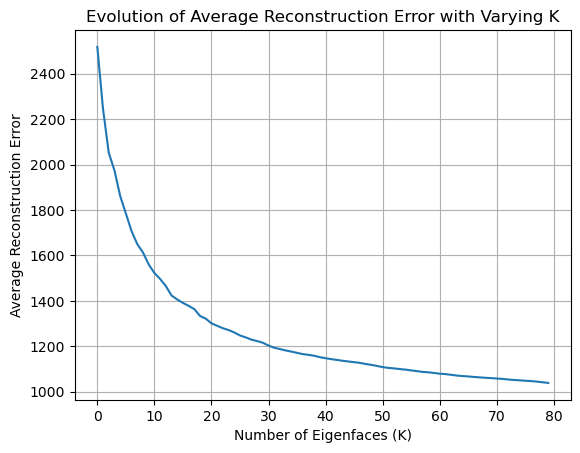

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Number of eigenfaces to consider
num_eigenfaces = 80

# Array to store average reconstruction errors for different K values
error = np.zeros(num_eigenfaces)

# Calculate the mean face of the training set
x_mean_train = meanFaces(X_train)

# Loop through different values of K
for K in range(num_eigenfaces):
    # Loop through all test faces
    for i in range(len(X_test.T)):
        # Project, reconstruct, and calculate the reconstruction error
        z = projEigenface(X_test.T[i], x_mean_train, U, K)
        x_r = reconstruct(z, x_mean_train, U, K)
        error[K] += errorReconstruct(x_r, X_test.T[i])

    # Calculate the average reconstruction error for this value of K
    error[K] /= len(X_test.T)

# Plot the evolution of the average reconstruction error
plt.plot(error)
plt.xlabel('Number of Eigenfaces (K)')
plt.ylabel('Average Reconstruction Error')
plt.title('Evolution of Average Reconstruction Error with Varying K')
plt.grid(True)
plt.show()

# Exercise 4: Face recognition and identification

Each reference face $x_k^{train}$ has an identity associated with it, in the form of a $id^{train}(k)$ number. In this section, we try to identify a face $x^{test}$ from the reference faces.

The simplest method is to compare the projection $z^{test}$ of the test face $x^{test}$ with the projection $z_k^{train}$ of each reference image $x_k^{train}$ (see Figure 7). The dissimilarity between the two projected vectors is quantified by the distance in subspace $E_k(x^{test})$:

$$E_k(x^{test}) =\|z^{test}-z_k^{train}\|_2$$

![Figure_7.png](./figs/Figure_7.png)
<center>Figure 7: Projection of an image $J$ in the subspace of faces and comparison with a reference face $I_k$, in case $K=2$.<center>

This distance is evaluated for each reference face, we can determine the reference face $x_k^{train}$ closest to the test face $x^{test}$. **Its identifier $id^{train}(k)$ then allows for the recognition of the tested face.**


1.  What is the advantage of calculating the distance $E_k(x^{test})$ in the subspace of faces rather than in the original space?

Your answer: The faces need to be centered to calculate this distance. So it is much easier to calculate the distance in the subspace rather in the original space.

2.  Write a function ``computeMatDist()`` which takes as arguments the training set of centered faces, $\mathbf Xc_{train}$ of size $d\times N_{train}$, the test set of centered faces, $\mathbf Xc_{test}$ of size $d\times N_{test}$, the subspace of eigenfaces, $\mathbf W$ and $K$, and computes the matrix $D$ of distance between a face of the test set and a face of the training set. $D$ is of size $N_{test} \times N_{train}$.

In [18]:
def calculMatDist(X_train, X_test, W, K):
    """ Array[d,n]*Array[d,m]*Array[d,n]*int -> Array[m,n]"""
    N_train = X_train.shape[1]
    N_test = X_test.shape[1]

    # Initialize the matrix of distances
    D = np.zeros((N_test, N_train))

    # Loop through each test face
    for i in range(N_test):
        # Project the test face onto the subspace
        z_test = projEigenface(X_test[:, i], meanFaces(X_train), W, K)

        # Loop through each training face
        for j in range(N_train):
            # Project the training face onto the subspace
            z_train = projEigenface(X_train[:, j], meanFaces(X_train), W, K)

            # Calculate the Euclidean distance between the projected faces
            distance = np.linalg.norm(z_test - z_train)

            # Store the distance in the matrix
            D[i, j] = distance

    return D


3.  Write a function `identification()` which takes as argument the matrix of distances $D$ (computed by the previous function), the vector of identification of the training set $id^{train}$, and returns the identificaton vector $\hat{id}^{test}$ of size $N_{test}$ of the elements of the test set.

In [19]:
def identification(D, id_train):
    """ Array[m,n]*Array[n] -> Array[m]"""
    # Get the dimensions of the distance matrix
    N_test, N_train = D.shape

    # Initialize the identification vector for the test set
    id_test = np.zeros(N_test)

    # Loop through each test face
    for i in range(N_test):
        # Find the index of the minimum distance in the corresponding row of the distance matrix
        min_index = np.argmin(D[i, :])

        # Assign the identification of the nearest training face to the test face
        id_test[i] = id_train[min_index]

    return id_test

4. Compute for $K=30$ the identification rate by comparing $\hat{id}^{test}$ to $id^{test}$ labels. Then vary $K$, and plot the curve of the number of recognized faces as a function of $K$. Explain the shape of the curve obtained. Which value of $K$ can be taken to have a good recognition and a low calculation time?

Identification Rate for K=30: 100.00%


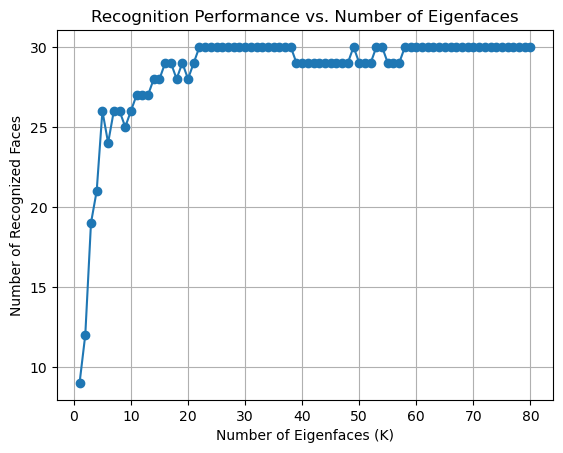

In [45]:
# Step 1: Compute for K=30
K = 30
W = U

D_30 = calculMatDist(X_train, X_test, W, K)
id_test_30 = identification(D_30, id_train)
identification_rate_30 = np.sum(id_test_30 == id_test) / len(id_test)
print(f"Identification Rate for K=30: {identification_rate_30:.2%}")

# Step 2: Vary K and Plot the Curve
max_K = 80
num_recognized_faces = []

for K in range(1, max_K + 1):
    D = calculMatDist(X_train, X_test, W, K)
    id_test_1 = identification(D, id_train)
    num_recognized_faces.append(np.sum(id_test_1 == id_test))

# Step 3: Plot the Curve
plt.plot(range(1, max_K + 1), num_recognized_faces, marker='o')
plt.xlabel('Number of Eigenfaces (K)')
plt.ylabel('Number of Recognized Faces')
plt.title('Recognition Performance vs. Number of Eigenfaces')
plt.grid(True)
plt.show()

As observed in the curve, we need a K greater than 22 in order to have the maximum recognized faces. On the other hand, we need the smallest possible K, so that the calculation time is as little as possible. In the curve we can see that for K > 58 the recognized faces are the maximum, but the same applies for 22 < K < 38. The smallest K for which both conditions are met is 22. The calculation time is the lowest and the recognized faces are maximum. Generally, for K values of over 30 the calculation process can take time. Eventually, one good value range for K would be 22-27, according to the figure above.

5.  **Bonus question**: for $K=30$, calculate for each face of the training set its distance in the subspace $\mathbf W_K$ from each element of the training set. Display the result as the image of a matrix. Comment the result.

6. **Bonus question**: What are the minimal and maximal distances between two faces of the same category (i.e. same person)? Between two faces of different categories? If we want to choose a threshold $\theta$  to detect the presence of an unknown face, which indications do the previous min/max values give us?

# Exercise 5: face/non-face classification

Until now, we focused on comparing facial images with each other. However, the method provides information that we have not yet used. In particular, the reconstruction error can be used to verify that an image is indeed an image of a face. When an image contains something other than a face (an image of a flower, a person seen in its entirety, a random image...), we can say that it is a non-face (database *noface*).

![figure8](./figs/Figure_8.png)
<center>Figure 8: Illustration of possible cases for classifying an image: case 1,2) $Z$ close to subspace: it is a face 3,4) $Z$ far from subspace: it is not a face, 1) $Z$ is an identified face, case 2) $z$ is an unknown face, case 3) risk of identifying $Z$ as a face when it is not.

1.  With $K=30$, for each set, training set, test set, and *noface* set, plot the reconstruction error of all the images of each set (this provides 3 plots). Compute the minimal, average, maximal errors for the three sets. Which conclusion can be drawn?

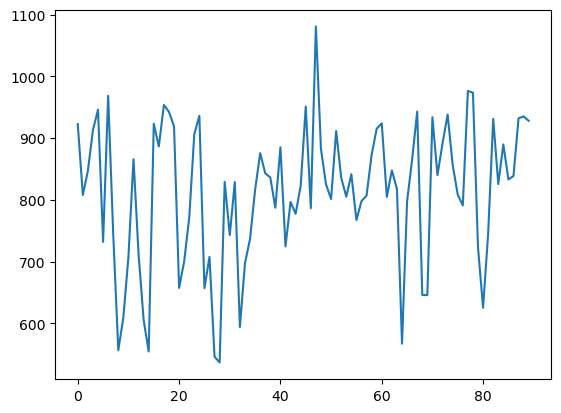

For the train set, the minimum error is: 536.4401161364849
For the train set, the average error is: 811.9744510277386
For the train set, the maximum error is: 1080.7572997669579


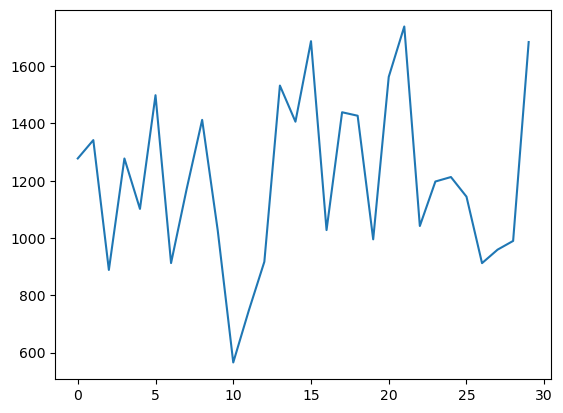

For the test set, the minimum error is: 565.5035106990127
For the test set, the average error is: 1203.1290086521908
For the test set, the maximum error is: 1738.367283850769


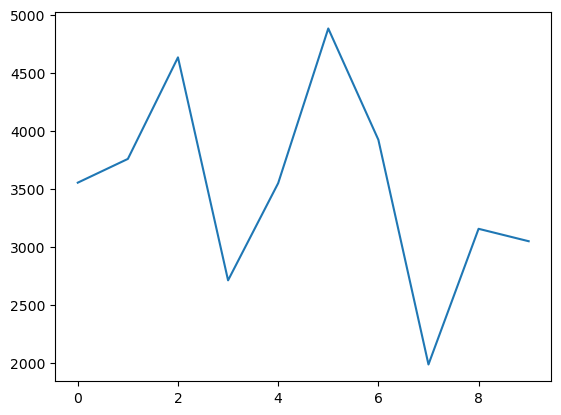

For the noface set, the minimum error is: 1984.8302725906358
For the noface set, the average error is: 3519.3049355664234
For the noface set, the maximum error is: 4882.099590924444


In [21]:
x_moy = meanFaces(X_train)
error_faces_train = np.zeros(len(X_train.T))
error_faces_test = np.zeros(len(X_test.T))
error_nonfaces = np.zeros(len(X_noface.T))

for i in range(len(X_train.T)):
    z=projEigenface(X_train.T[i], x_moy, U, 30)
    x_r=reconstruct(z, x_moy, U,30)
    error_faces_train[i]=errorReconstruct(x_r, X_train.T[i])

for i in range(len(X_test.T)):
    z = projEigenface(X_test.T[i], x_moy, U, 30)
    x_r = reconstruct(z, x_moy, U, 30)
    error_faces_test[i] = errorReconstruct(x_r, X_test.T[i])
    
for i in range(len(X_noface.T)):
    z = projEigenface(X_noface.T[i], x_moy, U, 30)
    x_r = reconstruct(z, x_moy, U, 30)
    error_nonfaces[i] = errorReconstruct(x_r, X_noface.T[i])

    
plt.plot(error_faces_train)
plt.show()
print("For the train set, the minimum error is:", np.amin(error_faces_train))
print("For the train set, the average error is:", np.mean(error_faces_train))
print("For the train set, the maximum error is:", np.amax(error_faces_train))
    
plt.plot(error_faces_test)
plt.show()
print("For the test set, the minimum error is:", np.amin(error_faces_test))
print("For the test set, the average error is:", np.mean(error_faces_test))
print("For the test set, the maximum error is:", np.amax(error_faces_test))

plt.plot(error_nonfaces)
plt.show()
print("For the noface set, the minimum error is:", np.amin(error_nonfaces))
print("For the noface set, the average error is:", np.mean(error_nonfaces))
print("For the noface set, the maximum error is:", np.amax(error_nonfaces))

The conclusion that can be drawn from the above is that we can tell really easily between the face and the noface set. For the noface set all errors are much greater. This means that if an error is above the 1800 threshold we have a noface, while if it is below we have a face. Distinction between train and test set for faces is not that simple. We can see that the minimum error values are very close to each other, however the average and maximum error values are significantly different. Still, we can see that for the train set the errors are smaller, which verifies all the above computations and allegations. 

2. Visualize the reconstruction error by displaying the original image and the reconstructed image for 10 images of the face database, and for the 10 images of the noface database. Comment the results.

Below is the face set reconstruction:


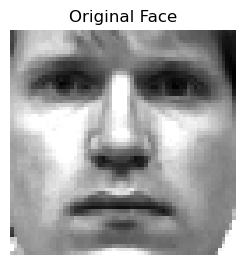

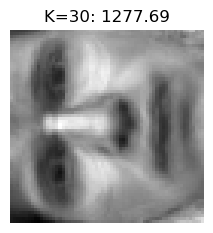

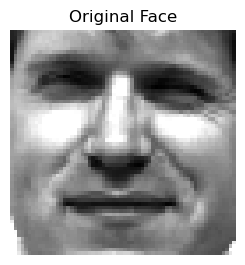

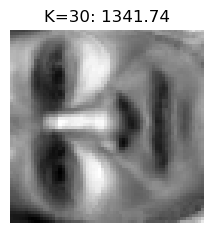

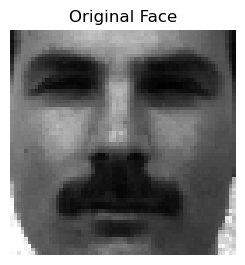

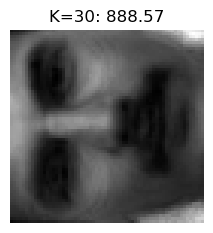

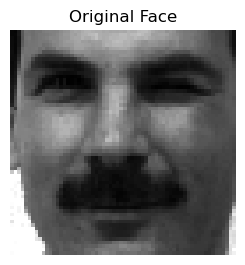

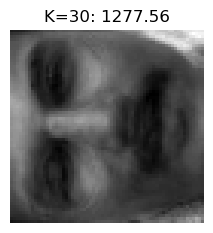

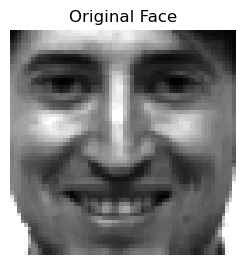

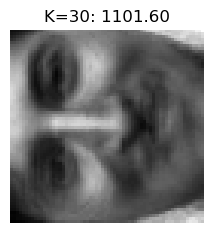

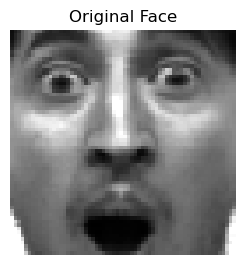

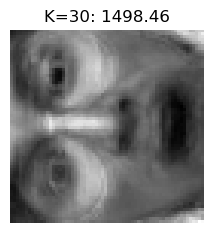

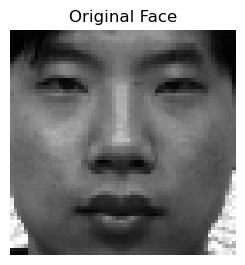

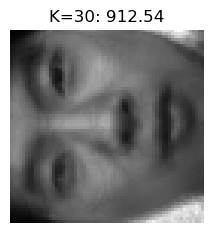

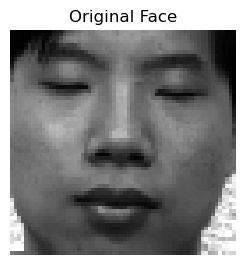

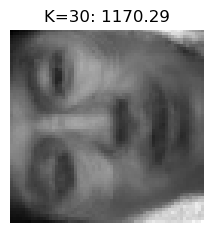

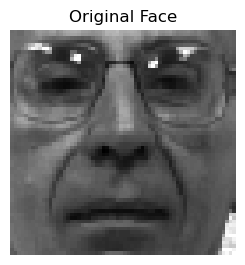

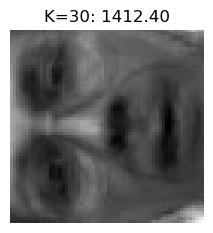

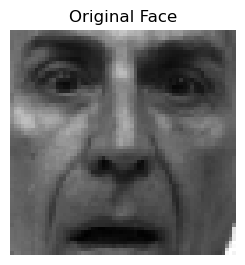

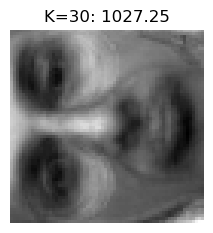

Below is the noface set reconstruction:


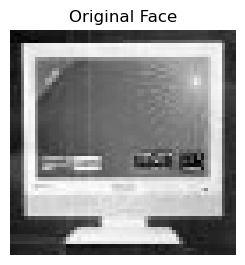

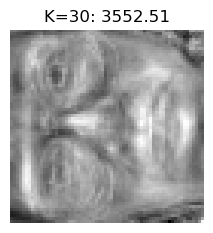

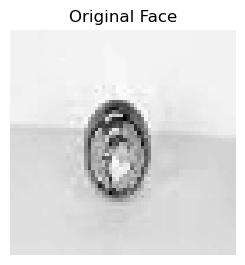

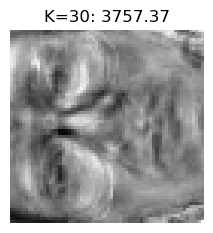

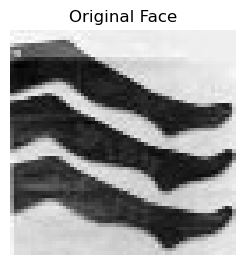

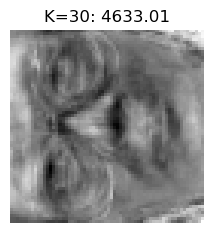

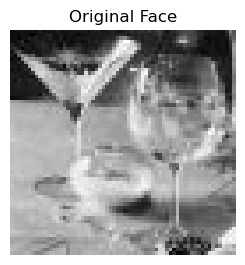

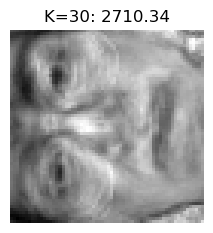

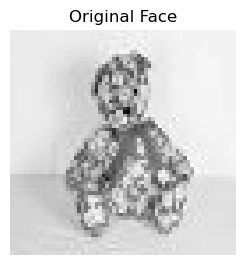

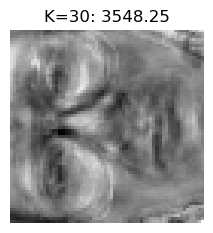

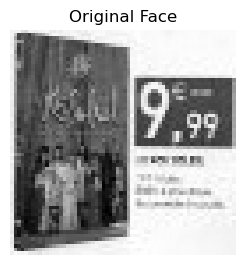

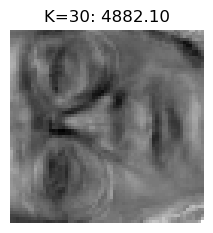

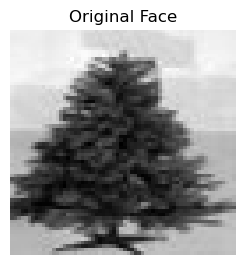

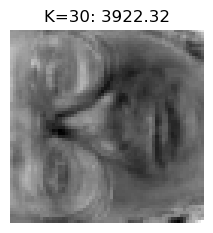

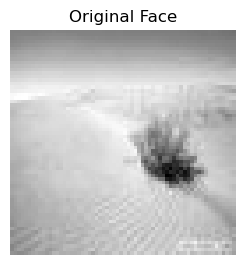

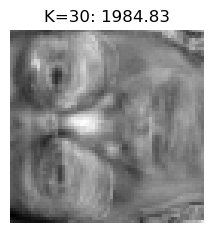

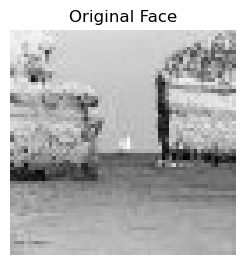

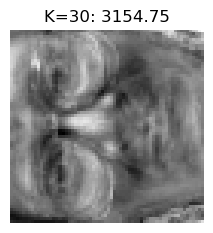

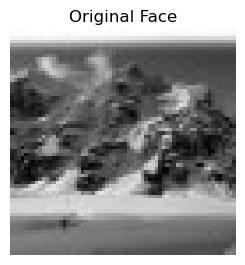

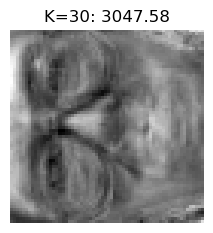

In [22]:
print(f"Below is the face set reconstruction:")
for i in range(10):
    affiche_reconstruction(X_test.T[i], x_moy, U, [30])

print(f"Below is the noface set reconstruction:")
for i in range(10):
    affiche_reconstruction(X_noface.T[i], x_moy, U, [30])

We can now see clearly that the error for the face images is much smaller, since we are reconstructing the images from vectors from actual face images. In the second part we are tying to reconstruct images from no face images, making it much more difficult since the vectors are not coming from faces but other objects/sceneries. That is why the error values for the no face set are much greater and also the reconstructed images are more blurred.